# __REGRESSION__

# 1. Simple Linear Regression

Relational 1 variabel dependent (y) dengan 1 variabel independent (x)

In [1]:
#1. Import Library

import statsmodels.api as sm
import seaborn as sns
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Study case: Tips Dataset

Dataset Description:
Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

From This information we frame the problem :
1. Problem Statements : How migh we predict tips that will be recieved by food servers so we can minimize unfair treatment ?
1. Data :
  1. Label : Tips
  1. Features : Total Bill
1. ML Objective : Minimize the appearance of unfair treatment of the food servers, for whom tips are major component of pay.
1. Action : Make food servers allocation 
1. Value : the sake of staff morale

In [2]:
#2. load dataset

tips = sns.load_dataset('Tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
#3. Melakukan feature scalling

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

scaler = StandardScaler()
df = tips[['total_bill', 'tip']]
std_df = df.copy()
scaler.fit(std_df)
std_df = scaler.transform(std_df)
std_df = pd.DataFrame(std_df, columns=df.columns)
std_df.head()

#Regresi linear itu harus terdistribusi normal
#standardscaler merubah dataset yg meannya gede bgt/kecil bgt menjadi 0, jadi std&variancenya jadi 1.
#diatas 2 itu outliers, karena 2kali std itu udah diujung tailnya

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020


Best practice untuk scaling: Yang discaling hanya X_i nya saja. Y nya biarin.

<br> StandardScaling = mean = 0; std = 1
<br> MinMaxScaler = min 0; max = 1
<br> RobustScaler = Robust terhadap outliers (untuk meminimalisir efek outliers)
MaxAbsScaler

In [4]:
#Menampilkan data outliers

std_df[(std_df['total_bill']>2) | (std_df['total_bill']<-2)]

,total_bill,tip
23,2.210010,3.318164
56,2.051300,0.001247
59,3.206166,2.702579
95,2.294430,1.254144
102,2.759302,-0.360862
112,2.058054,0.725464
142,2.409241,1.449682
156,3.194910,1.449682
170,3.492068,5.070772
182,2.877490,0.363356


3 EDA: untuk mengerti data kita dengan mengetahui:
- descriptive statistics
- correlation
- graphical summary

In [5]:
#3a. mengetahui describe data

std_df.describe()

#std mendekati satu

,total_bill,tip
count,2.440000e+02,2.440000e+02
mean,-6.597637e-17,2.846297e-16
std,1.002056e+00,1.002056e+00
min,-1.881547e+00,-1.447189e+00
25%,-7.247111e-01,-7.229713e-01
50%,-2.241005e-01,-7.117518e-02
75%,4.886857e-01,4.086192e-01
max,3.492068e+00,5.070772e+00


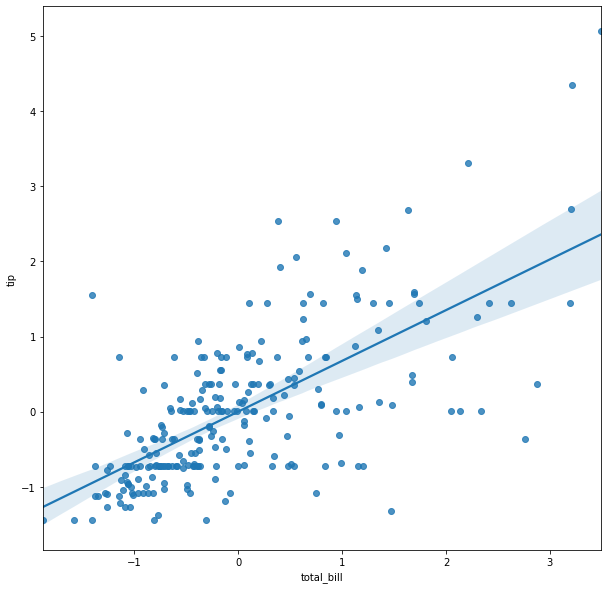

In [6]:
#3b. Membuat graphical summary

plt.figure(figsize=(10,10))
sns.regplot(x='total_bill', y='tip', data=std_df)

plt.show()

In [7]:
#3c. mengetahui korelasi == hasilnya sama kayak coef total bill

std_df.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [8]:
#cara manual koef: hasilnya sama kayak coef total bill
#person correlation mempunya hubungan dengan mencari nilai coef

r_pearson = std_df.corr()['tip'][0]
std_bill = std_df.describe()['total_bill'][2]
std_tip = std_df.describe()['tip'][2]

r_pearson*(std_tip/std_bill)

0.6757341092113647

In [9]:
r = df.corr()['tip'][0]
bill = df.describe()['total_bill'][2]
tip = df.describe()['tip'][2]

r*(tip/bill)

0.10502451738435341

#### __OLS (ordinary least squares)__

We start to apply simple linear regression to the dataset:
- Y : Tips
- x : Total Bill

In [10]:
#membuat OLS

                    #data y                             #data x
sm_lm_std = OLS(std_df['tip'], sm.add_constant(std_df[['total_bill']]))
result_std = sm_lm_std.fit()
print(result_std.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           6.69e-34
Time:                        11:52:37   Log-Likelihood:                -271.81
No. Observations:                 244   AIC:                             547.6
Df Residuals:                     242   BIC:                             554.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.81e-16      0.047   5.93e-15      1.0

## __Interpretation__

F-Test:
<br>
B1 : P-Value of the Simultant test (Prob (F-statistics)) is below 0.05. We have enough evidence that totall bill affect tip that given to the food servers.
<br>
<br>
Partial Test (T-test):
1. B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill has value of zero. in this case, it doesn't make sense that if there is people who paid food freely. So, the interpretation is the model still need B0. 
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that higher total bill increase tip that given to the food servers

Parameter Estimate(karena datanya sampel, jadi kalo datanya ditambah koef contantsnya bisa berubah):
1. B0 = 0.9203 : This is not need to be interpreted because there is no people that paid free (x = 0) and 0 also fall outside 3.07 Dollar - 50.81 Dollar interval
1. B1 = 0.1050 : When the total bill increase 1 Dollar, the tip will increase about 0.1050 Dollar or When the total bill increase 10 Dollar, the tip will increase about 1.05 Dollar (*This interpretation only recommended when total bill fall between 3.07 Dollar and 50.81 Dollar) 
1. It is strongly recommended to interprete within the interval of predictor.

Coefficient Determination:
<br>
R-Square = 45.7% : This model can explain 45.7% variation of tips.

- jika P>|t| kurang dari 0,05, bisa reject H0
- samping p>|t| itu ci, kolom 0.025 itu down dan 0.975 itu up jadi kalo diantara nilai itu ada 0nya contoh -0,093 dan 0,093 itu ada 0nya maka kita bisa ilang feature itu tidak punya hubungan

In [11]:
#4. Menentukan variabel X dan Y

#We start to apply simple linear regression to the dataset:
# y : Tips
# X : Total Bill

X = tips[['total_bill']] # predictor, dalam bentuk 2 dimensi / dataframe
y = tips['tip'] # target / dependent variable, dalam bentuk 1 dimensi / Series

In [12]:
#5. Membuat SLR

from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X, y) # training the model

LinearRegression()

In [13]:
#cara manual: mengetahui b1 koefisien

b1 = lr.coef_
b1

array([0.10502452])

In [14]:
#cara manual: mengetahui b0 intercept

b0 = lr.intercept_
b0

0.9202696135546731

In [15]:
#cara manual: mengetahui nilai r2

lr.score(X,y) # R2 score

0.45661658635167657

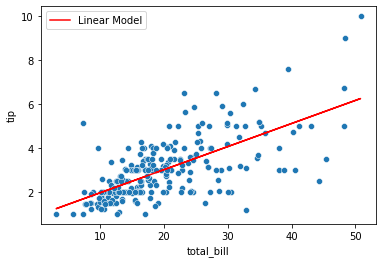

In [16]:
#membuat plot

sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.plot(tips['total_bill'], [b0+(b1*i) for i in tips['total_bill']], color='red', label='Linear Model')
plt.legend()
plt.show()

In [17]:
#membuat prediksi

y_pred = lr.predict(X)
tips['prediction'] = y_pred
tips

,total_bill,tip,sex,smoker,day,time,size,prediction
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

#model performance : mencari nilai mse

mse = mean_squared_error(tips['tip'], tips['prediction'])
mse

1.036019442011377

In [19]:
#model performance : mencari nilai rmse

rmse = np.sqrt(mse)
rmse

1.0178504025697377

In [20]:
# Membuktikan nilai OLS Fprob dengan cara manual 

#a. menghitung dulu nilai xi-mean

tips['xi-mean'] = tips['total_bill'] - np.mean(tips['total_bill'])
tips

,total_bill,tip,sex,smoker,day,time,size,prediction,xi-mean
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-2.795943
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-9.445943
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,1.224057
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,3.894057
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,4.804057
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,9.244057
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,7.394057
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.884057
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,-1.965943


In [21]:
# b. mencari nilai xi-mean(squared)

tips['(xi-mean)squared'] = tips['xi-mean']**2
tips

,total_bill,tip,sex,smoker,day,time,size,prediction,xi-mean,(xi-mean)squared
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-2.795943,7.817295
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-9.445943,89.225832
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,1.224057,1.498316
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,3.894057,15.163683
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,4.804057,23.078967
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,9.244057,85.452597
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,7.394057,54.672084
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.884057,8.317787
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,-1.965943,3.864930


In [22]:
#c. cara manual mencari nilai std b1 ==== Fprob di OLS (sama)

std_b1 = rmse / np.sqrt(np.sum(tips['(xi-mean)squared']))
std_b1

0.007334544177444975

In [23]:
#cara manual : mencari tstats ==== nilai t di OLS

t_stats = b1 / std_b1
t_stats

array([14.31916079])

# 2.Multiple Linear Regression

Relational 1 variabel dependent (y) dengan banyak variabel independent (x)

In [24]:
#1. membuat dataset yg digunakan

df2 = tips[['size', 'total_bill', 'tip']]
df2

,size,total_bill,tip
0,2,16.99,1.01
1,3,10.34,1.66
2,3,21.01,3.50
3,2,23.68,3.31
4,4,24.59,3.61
...,...,...,...
239,3,29.03,5.92
240,2,27.18,2.00
241,2,22.67,2.00
242,2,17.82,1.75


In [25]:
#2. melihat rangkuman statistik

df2.describe()

,size,total_bill,tip
count,244.000000,244.000000,244.000000
mean,2.569672,19.785943,2.998279
std,0.951100,8.902412,1.383638
min,1.000000,3.070000,1.000000
25%,2.000000,13.347500,2.000000
50%,2.000000,17.795000,2.900000
75%,3.000000,24.127500,3.562500
max,6.000000,50.810000,10.000000


In [26]:
#3. melihat korelasi

df2.corr()

,size,total_bill,tip
size,1.000000,0.598315,0.489299
total_bill,0.598315,1.000000,0.675734
tip,0.489299,0.675734,1.000000


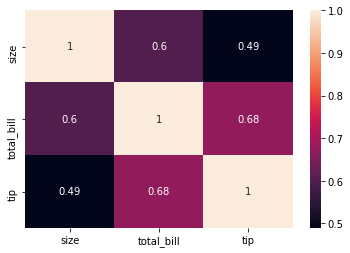

In [27]:
#3a. biar lebih mudah melihat korelasi

sns.heatmap(df2.corr(), annot = True)
plt.show()

Berkorelasi tinggi jika nilai korelasi diatas 0.8 


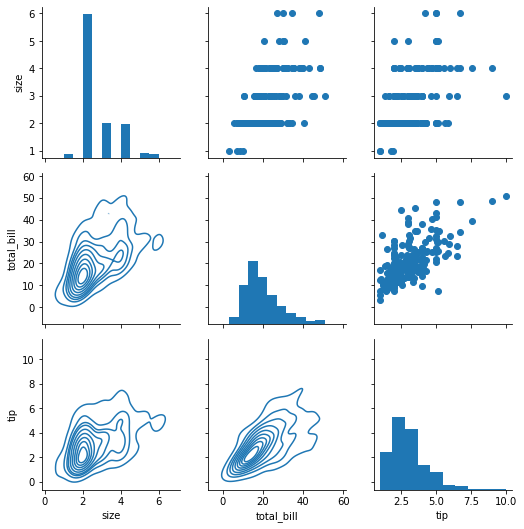

In [28]:
#3b. membuat

g = sns.PairGrid(df2)
g.map_diag(plt.hist) #yg diagonal
g.map_upper(plt.scatter) #yg baris atas
g.map_lower(sns.kdeplot)

#sns.PairPlot(df2)
#mirip pairplot, tapi kalo pairplot otomatis

plt.show()

In [29]:
#4. membuat OLS
             
X = df2[['total_bill', 'size']]
y = df2['tip']

lm_mr = OLS(y, sm.add_constant(X))
# lm_mr = OLS(df2['tip'], sm.add_constant(df2[['total_bill', 'size']]))

result = lm_mr.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           9.67e-34
Time:                        11:52:41   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

__Interpretasi OLS Table__

F-Test(__Lihat prob fstat__):
<br>
B1, B2 : P-Value of the Simultant test is below 0.05. We have enough evidence that minimum either totall bill or size affect tip that given to the food servers. 
<br>
<br>
Partial Test (__liat di p>|t|__):
1. B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill and size of the party has value of zero. in this case, it doesn't make sense that if there are people who paid food freely and size of the party zero. So, the interpretation is the model still need B0. 
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that total bill increase tip that given to the food servers
1. B2 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that size of the party increase tip that given to the food servers

Parameter Estimate (selalu estimate karena ketika data ditambah akan selalu berubah)(__dari coef__):
1. B0 = 0.689 : This is not meaningfull to be interpreted
1. B1 = 0.0927 : When the total bill increase 1 Dollar, the tip will increase about 0.0927 Dollar or When the total bill increase 10 Dollar, the tip will increase about 9.27 Dollar (*This interpretation only applied when total bill fall between 3.07 Dollar and 50.81 Dollar)
1. B2 = 0.1926 : When the size of the party increase 1 person, the tip will increase about 0.1926 Dollar(*This interpretation only applied when size of the party fall between 1 and 6) 
1. It is strongly recommended to interprete within the interval of predictor and no changes in another variable


Coefficient Determination:
<br>
R-Square adj = 46.3% : This model can explain 46.3% variation of tips.
<br>
(* by adding size of the party the coefficient determination increase from 45.7% to 46.3%)


In [30]:
#membuat model linearRegression

mr = LinearRegression()
mr.fit(X, y)

print('Slope:', mr.coef_) #B1
print('Intercept:', mr.intercept_) #B0
print('R2:', mr.score(X,y)) #r^2

Slope: [0.09271334 0.19259779]
Intercept: 0.6689447408125027
R2: 0.46786930879612587


In [31]:
#Membuat prediksi suatu data baru

#meja 01, terdapat 3customer dengan total bill $45, berapakah tips yg diberikan?
mr.predict([[45, 3]]) #ikutin format saaat menetukan var dan harus 2d

#berarti prediksi tip yaitu sekitar $5.4

array([5.41883828])

In [32]:
#membuat prediksi nilai Xdalam tabel

df2['prediction'] = mr.predict(X)
df2

<ipython-input-32-4557767dbea4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['prediction'] = mr.predict(X)


,size,total_bill,tip,prediction
0,2,16.99,1.01,2.629340
1,3,10.34,1.66,2.205394
2,3,21.01,3.50,3.194645
3,2,23.68,3.31,3.249592
4,4,24.59,3.61,3.719157
...,...,...,...,...
239,3,29.03,5.92,3.938206
240,2,27.18,2.00,3.574089
241,2,22.67,2.00,3.155952
242,2,17.82,1.75,2.706292


In [33]:
mse_mr = mean_squared_error(df2['tip'], df2['prediction'])
rmse_mr = np.sqrt(mse_mr)


print('MSE', mse_mr)
print('RMSE', rmse_mr)

MSE 1.014564905610028
RMSE 1.007256127114662


## __RESIDUAL ANALYSIS__

- Residu = nilai sebenarnya - nilai prediksi
- Untuk mengguji residual analysis:
1. Melihat distribusi normal dengan plot
2. Melihat distribusi normal dengan qqplot
3. Asumsi Gauss smirnovv


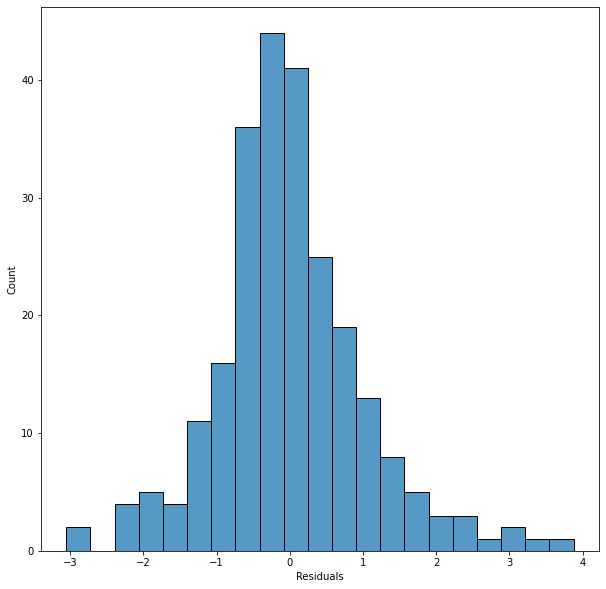

In [66]:
#1. Melihat distribusi dari plot (hasil: terdistribusi normal)

plt.figure(figsize=(10,10))
sns.histplot(result.resid)
plt.xlabel('Residuals')
plt.show()

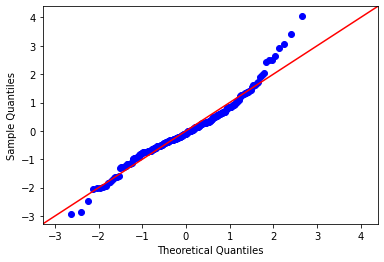

In [35]:
#Melihat distribusi dari qqplot (hasil: terdistribusi cukup normal)

sm.qqplot(result.resid, line='45')
plt.show()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


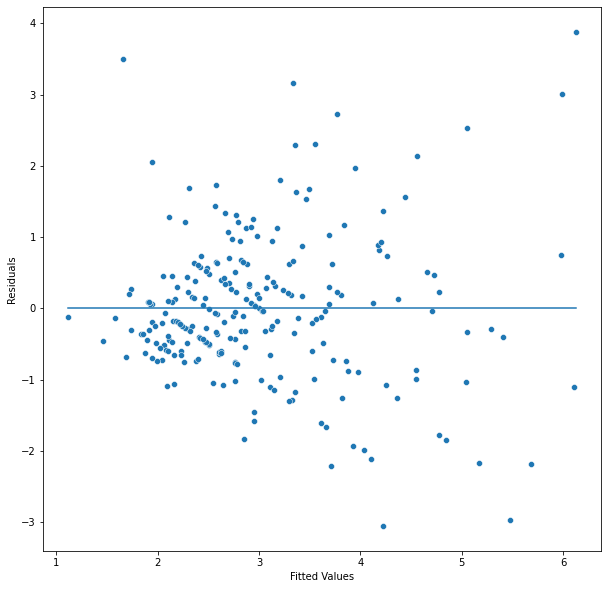

In [67]:
#3. Melihat asumsi Gauss-Markov

plt.figure(figsize=(10,10))
sns.scatterplot(result.fittedvalues, result.resid)
sns.lineplot(result.fittedvalues,0)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.show()

Melihat dengan kasat mata bahwa data mengkrucut ke kiri, boleh juga dilakukan pengujian ttest (apakah rata2 berada di 0 atau tidak)

## __MULTICOLINEARITY__

- Multicolinearity = ketika korelasi antar independent variabel memiliki hubungan yg kuat (Kuat jika nilai diatas 10, nilai 4-10 masih disebut multicol, dibawah 4 tidak multicol)
- Cek multicol pake VIF : Variance Inflaction Factor

In [37]:
#1. import library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
#2. membuat function menghitung vif

def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return vif

In [39]:
#menghitung vif dari kedua variabel independennya

calc_vif(df2[['total_bill', 'size']])

#hasilnya variabel tersebut multicol, 
#berarti pake salah satu variabelnya/menyatukan kedua variabel tsb

,variables,VIF
0,total_bill,8.684373
1,size,8.684373


Assumption Assesment:
1. If we refer to the histogram, the residual seemed normally distributed
1. Model residuals gather around zero
1. No certain pattern in the residual plot
1. Homoscedasticity Occur
1. vif is not acceptable : this is make sense because there should be relationship between size and total bill. So, actually we only need either total bill or size.

# __REGRESSION WITH DUMMY VARIABLE (DATA PREPROCESSING)__

In [40]:
#1. Siapin data

tips.drop(['xi-mean', '(xi-mean)squared'], axis=1, inplace=True)
tips.drop(['prediction'], axis=1, inplace=True)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [41]:
#2. membuat dummy variabel DF dengan membuat dummy pada data kategorikal yaitu kolom sex, smoker, day, dan time

tips_dummy = pd.get_dummies(tips, drop_first=True, columns = ['sex', 'smoker', 'day', 'time'])
tips_dummy

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,1,0,0,0
240,27.18,2.00,2,0,1,1,0,0,0
241,22.67,2.00,2,1,1,1,0,0,0
242,17.82,1.75,2,1,0,1,0,0,0


In [42]:
#3. Menentukan variabel x dan y, variabel x diambil dari hasil kolom yg telah di dummy

fitur = 'total_bill size sex_Male smoker_Yes day_Thur day_Sat day_Sun time_Lunch'.split()
target = 'tip'



In [43]:
#4. membuat OLS

lm_dum = OLS(tips_dummy[target], sm.add_constant(tips_dummy[fitur]))
result = lm_dum.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           1.20e-28
Time:                        11:52:43   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8038      0.353      2.279      0.0

- nilai fprob dibawah 0,05 berarti H0 ditolak
- tapi jika melihat pvalue, semua diatas 0.05 (yg telah dibuat dummy var, selain numerikal)

__(Hal ini menandakan model kita ada yg gak beres dan menjadikan coeff jadi bias)__

__5. Mengecek Residu Analysis__

we will asses some assumption and check the multicollinearity
1. Normality
1. Gauss-Markov
1. Multicollinearity

Text(0.5, 0, 'Residuals')

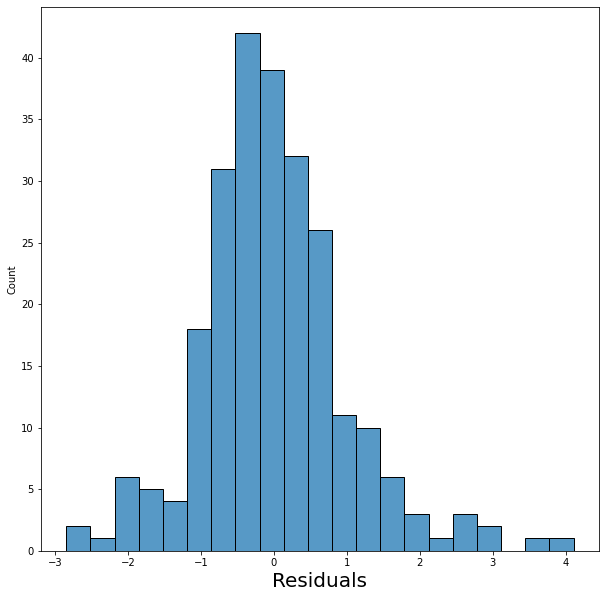

In [49]:
#5a. Melihat distribusi dari plot (hasil: terdistribusi normal)

plt.figure(figsize=(10,10))
sns.histplot(result.resid)
plt.xlabel('Residuals', fontsize=20)

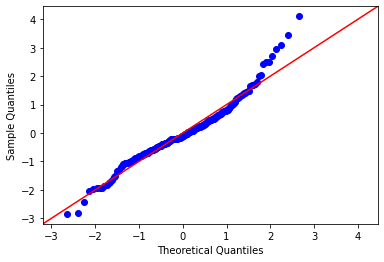

In [45]:
#5b. Melihat distribusi dari qqplot (hasil: terdistribusi normal)

sm.qqplot(result.resid, line='45')
plt.show()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

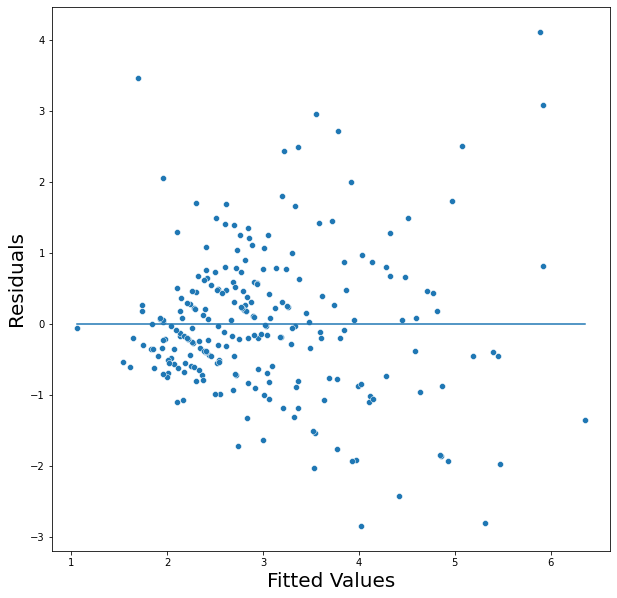

In [46]:
#5c. Melihat asumsi Gauss-Markov

plt.figure(figsize=(10,10))
sns.scatterplot(result.fittedvalues, result.resid)
sns.lineplot(result.fittedvalues, 0)
plt.xlabel('Fitted Values', fontsize=20)
plt.ylabel('Residuals', fontsize=20)

In [47]:
#6. Menghitung Multicol

calc_vif(tips_dummy[fitur])

#yg diatas dari nilai 4, berarti multicol
#jadi yg bisa dipakai yaitu column sex, smoker, day_fri (hari yg lain nilainya mendekati 4, jadi prefer gausa)

,variables,VIF
0,total_bill,9.954540
1,size,12.859838
2,sex_Male,2.908106
3,smoker_Yes,1.730499
4,day_Thur,9.028549
5,day_Sat,3.650268
6,day_Sun,3.754085
7,time_Lunch,10.084117


__Assumption Assesment:__
1. If we refer to the histogram, the residual seemed normally distributed
1. Model residuals gather around zero
1. No certain pattern in the residual plot
1. Homoscedasticity Occur
1. vif is not acceptable : this is make sense because there should be relationship between size and total bill. So, actually we only need either total bill or size. time dinner has the highest value of vif, it's reasonable if we exclude time dinner from model.

In [56]:
#7. Menentukan variabel dari hasil dummy (yg vif diatas 4 gausa)

fitur = 'total_bill sex_Male smoker_Yes day_Sat day_Sun'.split()
target = 'tip'



In [57]:
#8. membuat OLS

lm_dum2 = OLS(tips_dummy[target], sm.add_constant(tips_dummy[fitur]))
result = lm_dum2.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     40.70
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           3.68e-30
Time:                        12:10:48   Log-Likelihood:                -349.57
No. Observations:                 244   AIC:                             711.1
Df Residuals:                     238   BIC:                             732.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9772      0.188      5.207      0.0

In [58]:
#9. Mengecek multicol kembali dari hasil dummy yg terpilih (nilai tidak ada yg diatas 4)

calc_vif(tips_dummy[fitur])

,variables,VIF
0,total_bill,3.696123
1,sex_Male,2.738389
2,smoker_Yes,1.618801
3,day_Sat,2.001143
4,day_Sun,1.990366


__Mengecek dari hasil OLS__

- Nilai pvalue untuk sex dan time diatas 0,05 == tidak ada hubungan yg significant dengan tips

In [59]:
fitur

['total_bill', 'sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun']

In [62]:
#10. Membuat model linear regression

lr_dm = LinearRegression()
X = tips_dummy[fitur]
y = tips_dummy[target]

lr_dm.fit(X, y)

LinearRegression()

In [65]:
#11. Melakukan prediksi

lr_dm.predict([[35.3, 0, 1, 1, 0]])
               #total_bill ($), female, perokok, sabtu, bukan minggu
    
#prediksi tips sebanyak $4,5

array([4.52121591])

## Kesimpulan Regressi berdasarkan tujuan penelitian

Jika melakukan regresi, dengan tujuan:

1. Untuk prediksi:
    - Multicol bukan masalah besar, bisa lgsg memakai semua variabel
    - R2 yang paling tinggi, RMSE yang paling kecil
    - eliminasi var independen dengan pvalue diatas 0,05
    
2. Untuk analisa relationship:
    - Multicol menjadi sangat penting
    - Nilai R2 menjadi sinyal, adanya multicol dll
    - Homogenitas data
    - nilai pvalue var independen dibawah 0,05

Best practice untuk scaling: Yang discaling hanya X_i nya saja. Y nya biarin.

StandardScaling = mean = 0; std = 1
MinMaxScaler = min 0; max = 1
RobustScaler = Robust terhadap outliers (untuk meminimalisir efek outliers)
MaxAbsScaler